In [ ]:
#Deep Learning NLP

In [ ]:
# Question: What is 1 idea that you have to improve your model's performance on this dataset?
# Answer: Using Principal component analysis , we can reduce vector dimension and then train the model for better performance

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from textblob import Word
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py

nltk.download('stopwords')
nltk.download('wordnet')


stop = stopwords.words('english')
st = PorterStemmer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Date has been loaded , and onther attribute has been introduced as "label" indicating whether the text is Fake or Real

In [3]:
data = pd.read_csv("Dataset.csv")

In [ ]:
fake = pd.read_csv("Fake.csv")
fake["label"]=0

In [ ]:
real = pd.read_csv("True.csv")
real["label"]=1

In [ ]:
# Data from from both files been merged

In [ ]:
df = pd.concat([fake,real])
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Sentiments have been calculated for each text for additional feature engineering

In [ ]:
df["sentiment"] = df.text.apply(lambda x: TextBlob(x).sentiment[0] )

In [ ]:
df["sentiment"] = df.sentiment.apply(lambda x: 'positive' if x > 0 else 'negative' )

In [ ]:
df.head()

,title,text,subject,date,label,sentiment
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,positive
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,negative
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,negative
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,negative
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,negative


In [ ]:
# Title , Text and Sentiment have been merged. After that preprocessing on the text has been done.

In [ ]:
df["merged"]=df.title +" "+ df.text + " "+df.sentiment

In [ ]:
df["merged"] = df["merged"].str.lower() # For lowercasing

In [ ]:
df["merged"] = df["merged"].str.replace('[^\w\s]','') # For removing punctuations

In [ ]:
df["merged"]=df["merged"].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # For removing stopwords

In [ ]:
df["merged"]=df["merged"].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) # For stemming 


In [ ]:
df["merged"]=df["merged"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) # For lematization

In [ ]:
df.head()

,title,text,subject,date,label,sentiment,merged
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,positive,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,negative,drunk brag trump staffer start russian collus ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,negative,sheriff david clark becom internet joke threat...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,negative,trump ob even obama name code websit imag chri...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,negative,pope franci call donald trump christma speech ...


In [ ]:

sentences = df['merged'].values
y = df['label'].values
# For splitting the training and testing dataset
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
# The sentences have been vectorized for embedding
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
# Model buidling
input_dim = X_train.shape[1]  
model = Sequential()
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
# Model configurations
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                11057792  
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 11,062,017
Trainable params: 11,062,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Fitting
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/10
3368/3368 [==============================] - 125s 37ms/step - loss: 0.1434 - accuracy: 0.9571 - val_loss: 0.0411 - val_accuracy: 0.9903
Epoch 2/10
3368/3368 [==============================] - 124s 37ms/step - loss: 0.0293 - accuracy: 0.9939 - val_loss: 0.0233 - val_accuracy: 0.9942
Epoch 3/10
3368/3368 [==============================] - 125s 37ms/step - loss: 0.0127 - accuracy: 0.9970 - val_loss: 0.0310 - val_accuracy: 0.9946
Epoch 4/10
3368/3368 [==============================] - 123s 37ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.0300 - val_accuracy: 0.9939
Epoch 5/10
3368/3368 [==============================] - 127s 38ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0351 - val_accuracy: 0.9952
Epoch 6/10
3368/3368 [==============================] - 123s 37ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0390 - val_accuracy: 0.9950
Epoch 7/10
3368/3368 [==============================] - 123s 36ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 1.0000
Testing Accuracy:  0.9951


In [ ]:
prediction = np.round(model.predict(X_test)).flatten()
type(prediction)

numpy.ndarray

In [ ]:
probas = model.predict_proba(X_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 5313
False Positives: 40
True Negatives: 5857
False Negatives: 15


In [ ]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [ ]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

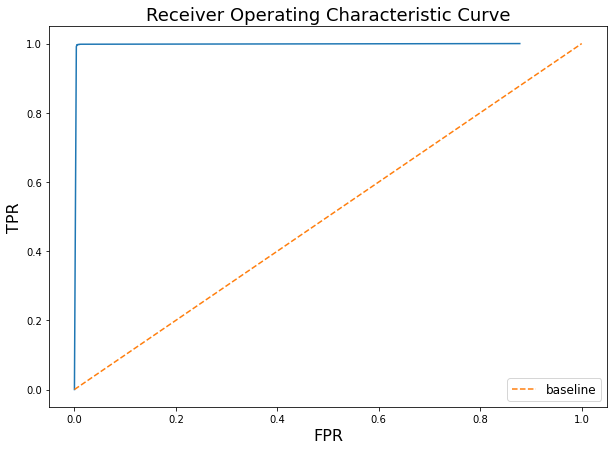

In [ ]:
# ROC AUC curve 
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

In [ ]:
# Top 10 associated words   
train1_df = df[df["label"]==1]
train0_df = df[df["label"]==0]

# Custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Custom function for horizontal bar chart 
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from sincere questions 
freq_dict = defaultdict(int)
for sent in train0_df["merged"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'red')

# Get the bar chart from insincere questions 
freq_dict = defaultdict(int)
for sent in train1_df["merged"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

